In [28]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pylab as plt
from scipy.stats import norm
import math
import seaborn as sns

define the time horizon

In [29]:
years = 2
endDate = dt.datetime.now()
startTime = endDate - dt.timedelta(days=365*years)



000300.SS
CYBU.AS iShares China CNY Bond UCITS ETFS

In [30]:
tickers = ['000300.SS','CYBU.AS']

tickers = ['000300.SS','CYBU.AS']


#create a framework for closed_Prices


In [31]:
closePrices_df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker,start = startTime, end=endDate)
    closePrices_df[ticker] = data["Close"]
closePrices_df

C:\Users\Johnny\AppData\Local\Temp\ipykernel_10084\1009066580.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker,start = startTime, end=endDate)
[*********************100%***********************]  1 of 1 completed
C:\Users\Johnny\AppData\Local\Temp\ipykernel_10084\1009066580.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker,start = startTime, end=endDate)
[*********************100%***********************]  1 of 1 completed


000300.SS   CYBU.AS
Date                             
2023-07-24  3805.219971  4.931875
2023-07-25  3915.120117  4.919816
2023-07-26  3907.010010  4.915031
2023-07-27  3902.350098  4.920008
2023-07-28  3992.739990  4.929578
...                 ...       ...
2025-07-15  4019.060059  5.770400
2025-07-16  4007.199951  5.784600
2025-07-17  4034.489990  5.775000
2025-07-18  4058.550049  5.775100
2025-07-21  4085.607178       NaN

[483 rows x 2 columns]

Through np.Log and df.shift to calculate portfolio's log return

In [32]:
logReturn = np.log(closePrices_df/closePrices_df.shift(1))

In [33]:
logReturn

000300.SS   CYBU.AS
Date                           
2023-07-24        NaN       NaN
2023-07-25   0.028472 -0.002448
2023-07-26  -0.002074 -0.000973
2023-07-27  -0.001193  0.001012
2023-07-28   0.022899  0.001943
...               ...       ...
2025-07-15   0.000346  0.000503
2025-07-16  -0.002955  0.002458
2025-07-17   0.006787 -0.001661
2025-07-18   0.005946  0.000017
2025-07-21   0.006645       NaN

[483 rows x 2 columns]

Let's do a comparison with Excel
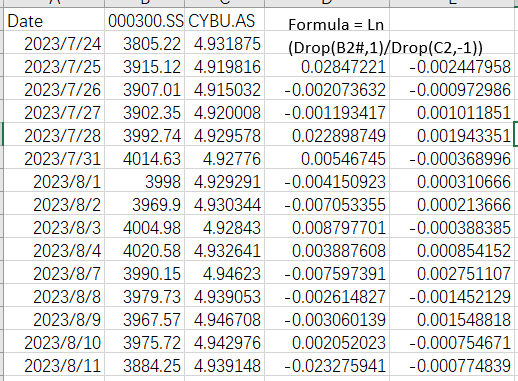

In [34]:
closePrices_df.to_csv('closePrices_df.csv')

delete the NAs

In [35]:
logReturn = logReturn.dropna()


set an initial value for the portfolio

In [36]:
portfolio = 1000000

set the weight

In [37]:
weights = {
    '000300.SS':0.6,
    'CYBU.AS':0.4
}


Multiply log return with the weights

In [38]:
Logreturn2 = logReturn.multiply(pd.Series(weights),axis=1) #here axis = 1 means we are multiplying it by columns
Logreturn2

000300.SS   CYBU.AS
Date                           
2023-07-25   0.017083 -0.000979
2023-07-26  -0.001244 -0.000389
2023-07-27  -0.000716  0.000405
2023-07-28   0.013739  0.000777
2023-07-31   0.003280 -0.000148
...               ...       ...
2025-07-14   0.000427 -0.000575
2025-07-15   0.000208  0.000201
2025-07-16  -0.001773  0.000983
2025-07-17   0.004072 -0.000664
2025-07-18   0.003568  0.000007

[469 rows x 2 columns]

Adding up the weighted values from two financial products that we chose

In [39]:
portfolioLogreturn = Logreturn2.sum(axis =1)
portfolioLogreturn

Date
2023-07-25    0.016104
2023-07-26   -0.001633
2023-07-27   -0.000311
2023-07-28    0.014517
2023-07-31    0.003133
                ...   
2025-07-14   -0.000148
2025-07-15    0.000409
2025-07-16   -0.000790
2025-07-17    0.003408
2025-07-18    0.003574
Length: 469, dtype: float64

Set up the time range for VaR we want to calculate
Assuming for ten days, so here we sum up for 10 days in a group

In [40]:
days = 10
portfolioLogreturnRolling = portfolioLogreturn.rolling(window=days).sum()
portfolioLogreturnRolling = portfolioLogreturnRolling.dropna()
portfolioLogreturnRolling



Date
2023-08-07    0.029636
2023-08-08    0.011382
2023-08-09    0.011799
2023-08-10    0.013039
2023-08-11   -0.015753
                ...   
2025-07-14    0.012019
2025-07-15    0.011805
2025-07-16    0.010160
2025-07-17    0.009773
2025-07-18    0.011215
Length: 460, dtype: float64

set up the confidence interval and calculate the Var
days goes up, loss goes up
CI goes up, loss goes up

In [41]:
CI = 0.99
VaR = portfolio * (math.exp(np.percentile(portfolioLogreturnRolling,100-CI*100)) - 1)
VaR


-39026.51030209403

Calculate the dollar value of profit and loss

In [42]:
return_windows = days
historyReturnrolling = portfolioLogreturnRolling.rolling(window=days).sum()
historyReturnrolling = historyReturnrolling.dropna()
PortfolioReturn = portfolio * (np.exp(historyReturnrolling) - 1)
PortfolioReturn

Date
2023-08-18    -69374.705393
2023-08-21   -131348.396582
2023-08-22   -167267.996216
2023-08-23   -209725.122779
2023-08-24   -248265.289042
                  ...      
2025-07-14    150098.155978
2025-07-15    150195.228203
2025-07-16    148578.382191
2025-07-17    136806.407562
2025-07-18    124540.213275
Length: 451, dtype: float64

Let's visualize the graph

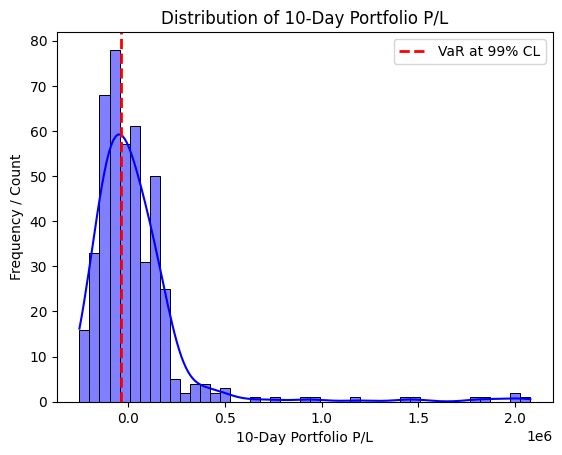

In [43]:

sns.histplot(PortfolioReturn, kde=True, color='blue')

# Axis labels and title in English
plt.xlabel(f'{return_windows}-Day Portfolio P/L')
plt.ylabel('Frequency / Count')
plt.title(f'Distribution of {return_windows}-Day Portfolio P/L')

# Vertical line for VaR
plt.axvline(
    VaR,
    color='red',
    linestyle='dashed',
    linewidth=2,
    label=f'VaR at {CI:.0%} CL'
)

plt.legend()
plt.show()